# Exploration Exercises
---
## Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named `explore.ipynb`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import prepare
import math
train, validate, test = prepare.wrangle_telco()
train.shape, validate.shape, test.shape

((3925, 32), (1683, 32), (1402, 32))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3925 entries, 3490 to 6463
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3925 non-null   int64  
 1   tenure                                 3925 non-null   int64  
 2   monthly_charges                        3925 non-null   float64
 3   total_charges                          3925 non-null   float64
 4   is_male                                3925 non-null   uint8  
 5   has_partner                            3925 non-null   uint8  
 6   has_dependents                         3925 non-null   uint8  
 7   has_phone_service                      3925 non-null   uint8  
 8   multiple_lines_No phone service        3925 non-null   uint8  
 9   multiple_lines_Yes                     3925 non-null   uint8  
 10  online_security_No internet service    3925 non-null   uint8  
 11  o

### 2. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

Since my true numerical columns consist of tenure, monthly_charges, and total_charges, those are the variables I will plot here.

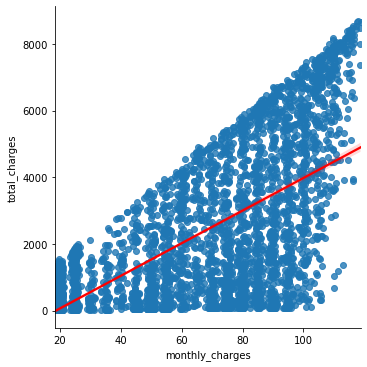

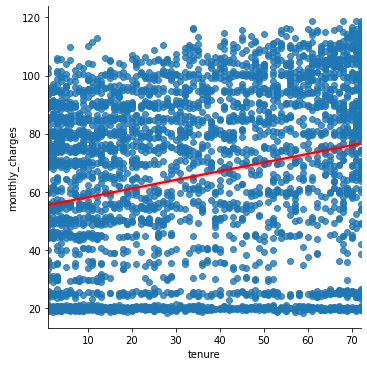

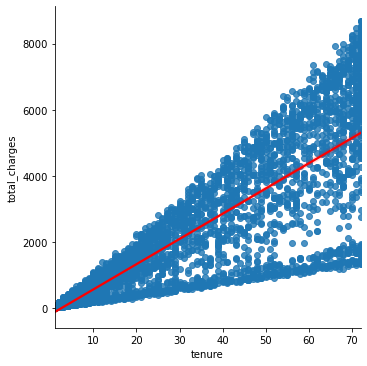

In [19]:
sns.lmplot(data=train, x='monthly_charges', y='total_charges', line_kws={'color':'red'})
sns.lmplot(data=train, x='tenure', y='monthly_charges', line_kws={'color':'red'})
sns.lmplot(data=train, x='tenure', y='total_charges', line_kws={'color':'red'})

In [23]:
def plot_variable_pairs(train):
    plot1= sns.lmplot(data=train, x='monthly_charges', y='total_charges', line_kws={'color':'red'})
    plot2= sns.lmplot(data=train, x='tenure', y='monthly_charges', line_kws={'color':'red'})
    plot3= sns.lmplot(data=train, x='tenure', y='total_charges', line_kws={'color':'red'})
    return plot1, plot2, plot3

(<seaborn.axisgrid.FacetGrid at 0x7fd4208893a0>,
 <seaborn.axisgrid.FacetGrid at 0x7fd442084d00>)

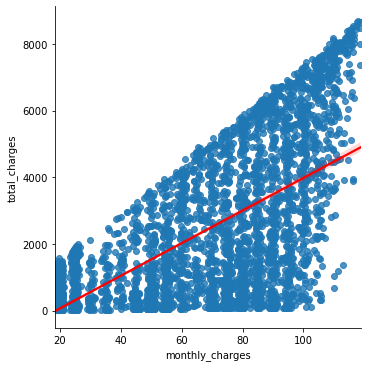

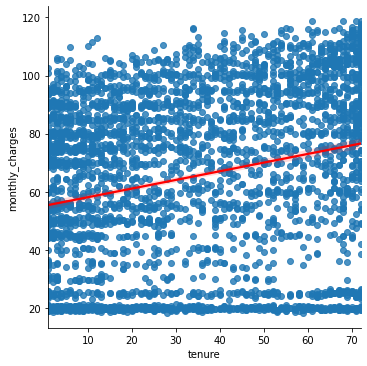

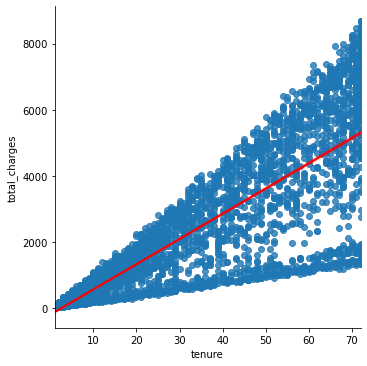

In [24]:
plot_variable_pairs(train)

### 3. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature `tenure_years`, in complete years as a customer.

In [37]:
# get fresh telco data
telco = prepare.acquire_telco()
# calculate years of tenure from original data
telco['tenure_years'] = (telco.tenure / 12)
# remove decimals to show number of whole years
telco['tenure_years'] = [math.trunc(num) for num in telco.tenure_years]
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_years
0,1,1,2,2794-XIMMO,Male,0,Yes,No,53,No,...,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check,4
1,1,1,2,2851-STERV,Male,1,No,No,35,Yes,...,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check,2
2,1,1,2,2898-LSJGD,Female,0,Yes,Yes,21,No,...,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check,1
3,1,1,2,2969-WGHQO,Female,0,Yes,Yes,7,Yes,...,Yes,No,No,69.45,477.05,No,One year,DSL,Electronic check,0
4,1,1,2,2988-PLAHS,Female,0,No,No,3,Yes,...,Yes,Yes,Yes,69.95,220.45,No,One year,DSL,Electronic check,0


In [104]:
# combine steps into function
def months_to_years(telco):
    telco['tenure_years'] = (telco.tenure / 12)
    telco['tenure_years'] = [math.trunc(num) for num in telco.tenure_years]
    return telco

In [107]:
# get fresh data
telco = prepare.acquire_telco()
# test function
months_to_years(telco).head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_years
0,1,1,2,2794-XIMMO,Male,0,Yes,No,53,No,...,Yes,Yes,Yes,60.45,3184.25,Yes,One year,DSL,Electronic check,4
1,1,1,2,2851-STERV,Male,1,No,No,35,Yes,...,Yes,Yes,Yes,73.00,2471.25,No,One year,DSL,Electronic check,2
2,1,1,2,2898-LSJGD,Female,0,Yes,Yes,21,No,...,Yes,Yes,Yes,55.95,1157.05,Yes,One year,DSL,Electronic check,1
3,1,1,2,2969-WGHQO,Female,0,Yes,Yes,7,Yes,...,Yes,No,No,69.45,477.05,No,One year,DSL,Electronic check,0
4,1,1,2,2988-PLAHS,Female,0,No,No,3,Yes,...,Yes,Yes,Yes,69.95,220.45,No,One year,DSL,Electronic check,0


In [105]:
# generalized function, just for practice
# def months_to_years(df, col):
#     '''
#     This function takes in a dataframe and a column name; it takes a number of
#     months from the inputted column and returns the number of whole years in a new
#     column. It returns the original dataframe with the new column added.
#     '''
#     df[f'{col}_years'] = (df[col] / 12)
#     df[f'{col}_years'] = [math.trunc(num) for num in df[f'{col}_years']]
#     return df

### 4. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [92]:
colvars = pd.DataFrame(train.dtypes, columns=['d_type']).reset_index()
colvars.d_type.value_counts()

uint8      27
float64     2
int64       2
object      1
Name: d_type, dtype: int64

In [93]:
train.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'is_male', 'has_partner', 'has_dependents', 'has_phone_service',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'has_paperless_billing', 'has_churned', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'customer_id'],
      dtype='object')

<AxesSubplot:xlabel='senior_citizen', ylabel='total_charges'>

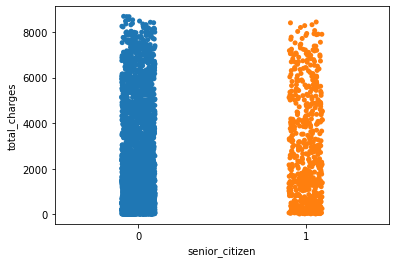

In [43]:
sns.stripplot(x='senior_citizen', y='total_charges', data=train)

<AxesSubplot:xlabel='senior_citizen', ylabel='monthly_charges'>

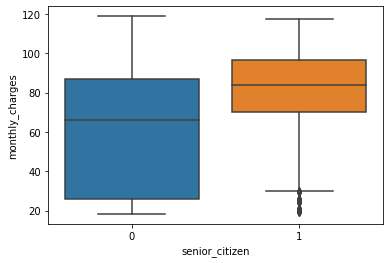

In [94]:
sns.boxplot(x='senior_citizen', y='monthly_charges', data=train)


<AxesSubplot:xlabel='internet_service_type_Fiber optic', ylabel='tenure'>

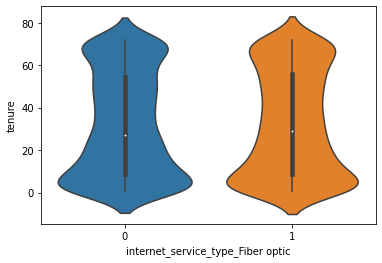

In [97]:
sns.violinplot(x='internet_service_type_Fiber optic', y='tenure', data=train)


<AxesSubplot:xlabel='multiple_lines_Yes', ylabel='total_charges'>

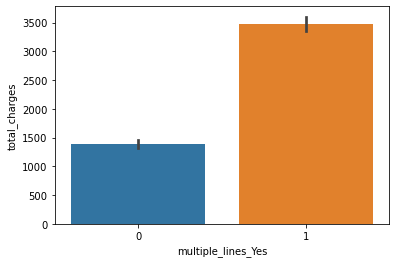

In [100]:
sns.barplot(x='multiple_lines_Yes', y='total_charges', data=train)


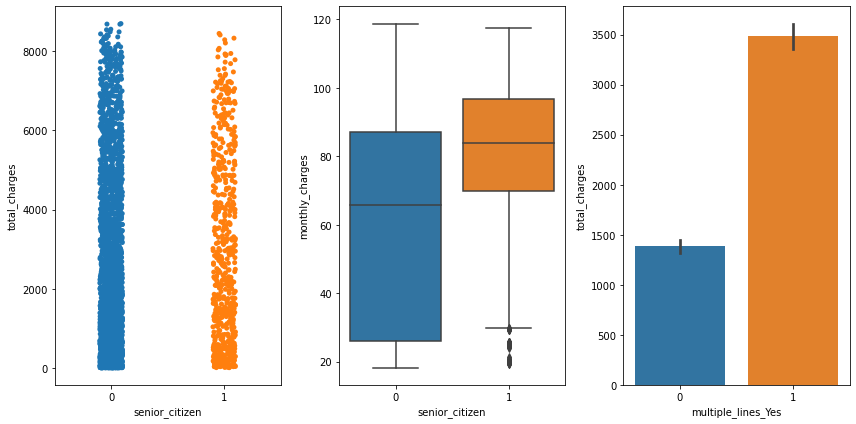

In [117]:
# set figure size
fig = plt.figure(figsize=(12,6))
# stripplot
plt.subplot(1, 3, 1)
sns.stripplot(x='senior_citizen', y='total_charges', data=train)
# boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='senior_citizen', y='monthly_charges', data=train)
# barplot
plt.subplot(1, 3, 3)
sns.barplot(x='multiple_lines_Yes', y='total_charges', data=train)
# fix spacing
plt.tight_layout();

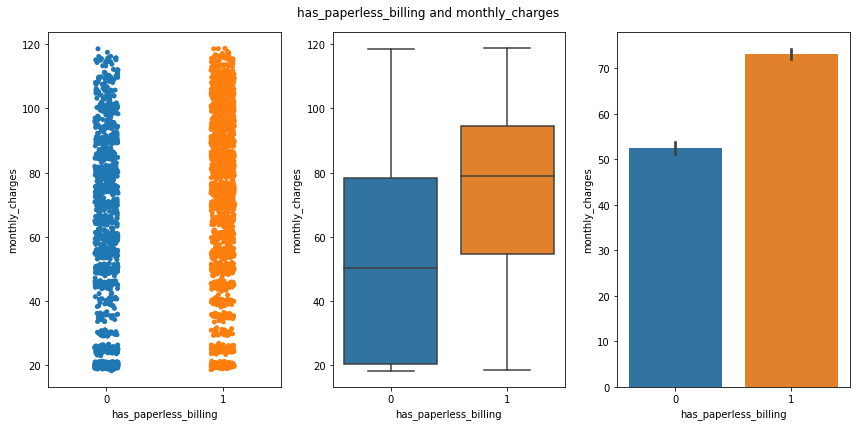

In [124]:
def plot_categorical_and_continuous_vars(df, cat_col, cont_col):
    '''
    This function takes in a dataframe and the names of a categorical and a continuous
    column. It returns a stripplot, boxplot, and barplot of the inputted features.
    '''
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1, 3, 1)
    sns.stripplot(x=cat_col, y=cont_col, data=train)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=cat_col, y=cont_col, data=train)
    plt.subplot(1, 3, 3)
    sns.barplot(x=cat_col, y=cont_col, data=train)
    plt.suptitle(f'{cat_col} and {cont_col}')
    plt.tight_layout()
    return plt.show();

plot_categorical_and_continuous_vars(train, 'has_paperless_billing', 'monthly_charges')

### 5. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

### 6. Explore your dataset with any other visualizations you think will be helpful.

### 7. In a separate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.